# Flight Price Prediciton

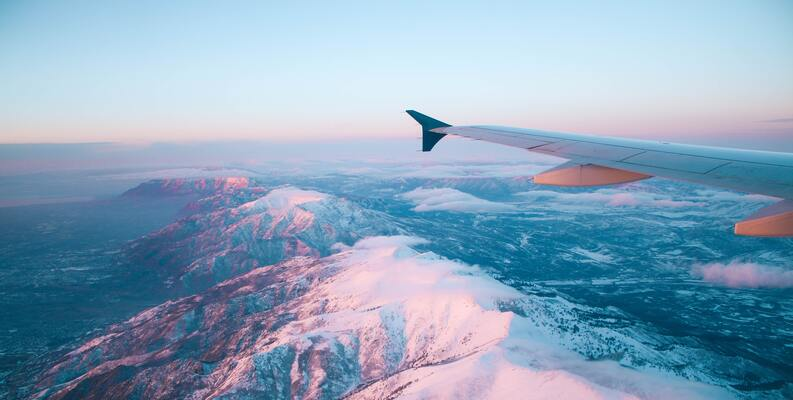

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_dataset.csv')

In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df = df.iloc[:,1:]

In [5]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# EDA

In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Intuition:

* Airline name should influence price
* flight number should be fairly immaterial
* source_city and destination city should be important
* class - should be a direct influence as well
* duration should not be important
* departure time and arrival time should be important
* days_left shoudl aslo be important

In [7]:
flight = df.drop('flight', axis = 1)

In [8]:
cat_columns = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
num_columns = ['duration', 'days_left']

In [9]:
flight.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
flight[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00


In [11]:
corr_matrix = flight[num_columns].corr()

C:\Users\akash\AppData\Local\Temp\ipykernel_14900\913142879.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(flight['duration'])
C:\Users\akash\AppData\Local\Temp\ipykernel_14900\913142879.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(flight['days_left'])


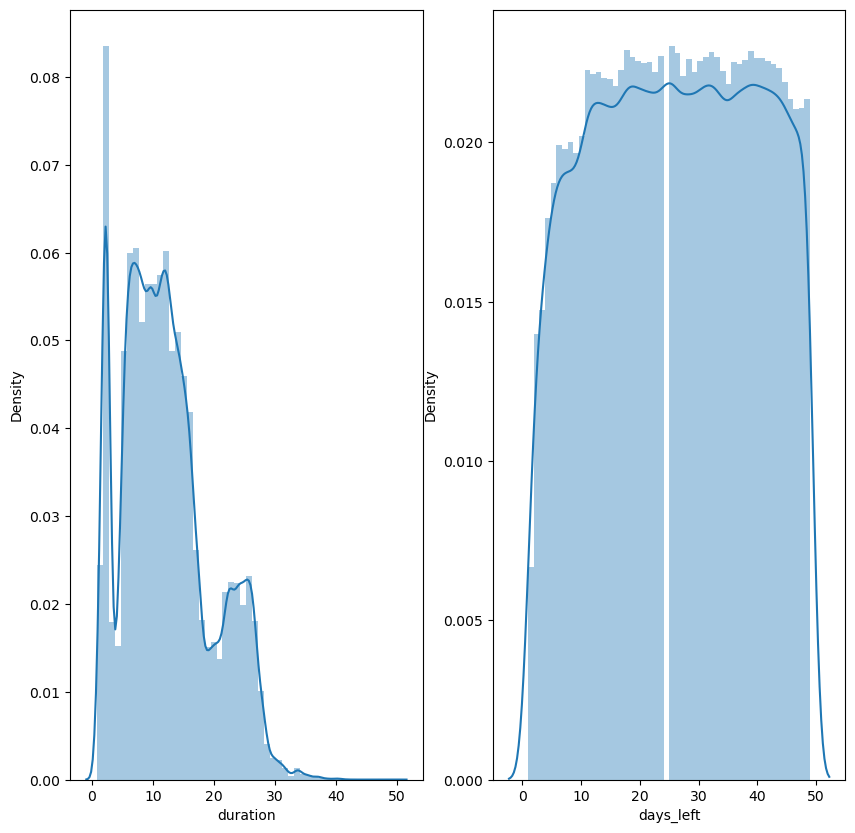

In [12]:
plt.figure(figsize = (10,10))
ax1 = plt.subplot(1,2,1)
ax1 = sns.distplot(flight['duration'])
ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(flight['days_left'])
plt.show()

In [13]:
duration = flight['duration'].values

duration_iqr = np.percentile(duration, 75) -  np.percentile(duration, 25)

duration_lower =  np.percentile(duration, 25) - (1.5 * duration_iqr)
duration_upper =  np.percentile(duration, 75) + (1.5 * duration_iqr)

outliers = list()
for i in flight['duration'].values:
    if i < duration_lower or i > duration_upper:
        outliers.append(i)
print('Duration IQR: ', duration_iqr)
print('Duration Lower:', duration_lower)
print('Duration upper:', duration_upper)
print('Number of outliers:', len(outliers))

Duration IQR:  9.340000000000002
Duration Lower: -7.1800000000000015
Duration upper: 30.180000000000003
Number of outliers: 2110


<Axes: >

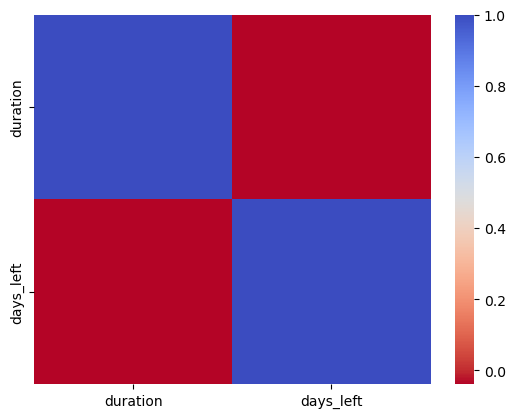

In [14]:
sns.heatmap(corr_matrix, cmap = 'coolwarm_r')

In [15]:
flight['days_left_cat'] = pd.cut(flight['days_left'], bins = [0.,10.,20.,30.,40.,50.], labels = [1,2,3,4,5])

In [16]:
flight['days_left_cat'].value_counts()

days_left_cat
4    64956
3    64902
2    64223
5    56705
1    49367
Name: count, dtype: int64

#### EDA Note 1: Duration needs to be checked for Outliers
#### EDA Note 2: Duration and Days_left needs to be scaled
#### EDA Note 4: Price has strong correlation with days_left. Hence, test split should be startified with days_left_cat
#### EDA Note 5: Catcolumns needs to be OHE


In [17]:
flight

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,days_left_cat
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,5
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,5
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,5
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,5


In [18]:
from sklearn.model_selection import train_test_split
flight_train, flight_test = train_test_split(flight, test_size = 0.05,stratify = flight['days_left_cat'], random_state = 42, shuffle = True) 

In [19]:
flight_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,days_left_cat
178567,Air_India,Hyderabad,Morning,one,Night,Chennai,Economy,12.25,28,4649,3
206023,Indigo,Chennai,Morning,zero,Afternoon,Hyderabad,Economy,1.33,42,1551,5
299027,Vistara,Chennai,Night,one,Afternoon,Hyderabad,Business,15.75,26,41064,3
42215,GO_FIRST,Delhi,Afternoon,one,Night,Chennai,Economy,8.00,44,4896,5
192387,Air_India,Chennai,Morning,one,Evening,Mumbai,Economy,9.58,38,5475,4
...,...,...,...,...,...,...,...,...,...,...,...
271638,Vistara,Kolkata,Morning,one,Night,Hyderabad,Business,10.50,31,49207,4
85178,AirAsia,Bangalore,Morning,one,Evening,Delhi,Economy,7.00,8,7484,1
243226,Air_India,Mumbai,Afternoon,one,Morning,Chennai,Business,16.92,26,49613,3
120204,Indigo,Kolkata,Early_Morning,one,Afternoon,Delhi,Economy,6.50,6,7466,1


In [20]:
flight_test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,days_left_cat
221728,Vistara,Delhi,Early_Morning,one,Afternoon,Hyderabad,Business,6.25,47,51697,5
60422,Vistara,Mumbai,Evening,one,Night,Bangalore,Economy,5.75,43,7135,5
54426,Vistara,Mumbai,Evening,one,Morning,Bangalore,Economy,15.08,11,11129,2
115681,Vistara,Bangalore,Evening,one,Night,Chennai,Economy,25.42,3,12454,1
264389,Vistara,Kolkata,Afternoon,one,Night,Mumbai,Business,8.50,8,64271,1
...,...,...,...,...,...,...,...,...,...,...,...
26942,Indigo,Delhi,Early_Morning,one,Afternoon,Kolkata,Economy,6.83,39,7572,4
108203,Indigo,Bangalore,Morning,one,Night,Kolkata,Economy,10.17,39,8171,4
16942,Vistara,Delhi,Morning,zero,Morning,Bangalore,Economy,2.75,35,4501,4
5960,Air_India,Delhi,Morning,one,Night,Mumbai,Economy,11.50,30,14355,3


In [21]:
flight_train.drop('days_left_cat', axis = 1, inplace=True)
flight_test.drop('days_left_cat', axis = 1, inplace=True)

In [22]:
X_train = flight_train.drop('price', axis = 1)
y_train = pd.DataFrame(flight_train['price'])

In [23]:
X_train[(X_train['duration'] < duration_lower) | (X_train['duration'] > duration_upper)].index

Index([146883, 269892, 128687, 158617, 143309, 194864, 264601, 119756, 115564,
       152274,
       ...
       194900, 111479, 204891, 193897, 192987, 113010,  72357, 103213, 185028,
        41551],
      dtype='int64', length=2007)

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
duration_ix = 7

class CombinedActions(BaseEstimator, TransformerMixin):
    def __init__(self, drop_outliers_duration = True):
        self.drop_outliers_duration = drop_outliers_duration
    def fit(self, X, y = None):
        return self
    def transform(self, X, y):
        if self.drop_outliers_duration:
            columns = X.columns
            duration = X['duration'].values
            duration_iqr = np.percentile(duration, 75) -  np.percentile(duration, 25)
            duration_lower =  np.percentile(duration, 25) - (1.5 * duration_iqr)
            duration_upper =  np.percentile(duration, 75) + (1.5 * duration_iqr)
            droped_idx = X[(X['duration'] < duration_lower) | (X['duration'] > duration_upper)].index
            X = X.drop(droped_idx)
            y = y.drop(droped_idx)
            #return pd.DataFrame(X, columns = columns)
            return X,y
            
            

In [25]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# outlier_pipeline = Pipeline([
#     ('selector', DataFrameSelector(cat_columns+num_columns)),
#     ('ca', CombinedActions()),
# ])

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_columns)),
    ('scaler', MinMaxScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_columns)),
    ('Ohe', OneHotEncoder(sparse_output = False))
])

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
#    ('outlier_pipeline', outlier_pipeline),
])

In [26]:
ca = CombinedActions()
X_train_no_out, y_train = ca.transform(X_train,y_train)
X_train_prepared = full_pipeline.fit_transform(X_train_no_out)
print('X_train: ',X_train_prepared.shape)
print('y_train: ',y_train.shape)


X_train:  (283138, 37)
y_train:  (283138, 1)


In [27]:
X_train_prepared

array([[0.38922972, 0.5625    , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01704158, 0.85416667, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.50852079, 0.52083333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.54839809, 0.52083333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19325153, 0.10416667, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.13940014, 0.75      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

### Training and fitting Model

In [28]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_prepared, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = linreg.predict(X_train_prepared)
print('Training R2 Score is: ', r2_score(y_train, y_pred))
print('Training Cost/RMSE is: ', np.sqrt(mean_squared_error(y_train, y_pred)))

Training R2 Score is:  0.9114547791323837
Training Cost/RMSE is:  6767.4054707327405


In [30]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_prepared, np.ravel(y_train))
y_pred = forest_reg.predict(X_train_prepared)
print('Training R2 Score is: ', r2_score(np.ravel(y_train), y_pred))
print('Training Cost/RMSE is: ', np.sqrt(mean_squared_error(np.ravel(y_train), y_pred)))

Training R2 Score is:  0.997440599018754
Training Cost/RMSE is:  1150.5587547902753


### GridSearch and Cross Val

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, X_train_prepared, y_train, scoring = 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)



D:\Python\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\Python\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\Python\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\Python\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

In [32]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean Score: ', np.mean(scores))

display_scores(rmse_scores)

Scores: [2737.93017335 2671.03567925 2737.87835432 2806.65452949 2734.61860171
 2736.07385554 2799.57628738 2734.86448288 2755.29622418 2718.77467368]
Mean Score:  2743.270286177957


### Fine Tuning using Randomized Search CV

In [34]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = [
    { 'n_estimators' : [10, 100],
      'max_features' : [2, 8],
      'max_depth' : [3, 8]
    }
]

forest_reg = RandomForestRegressor()

random_search = RandomizedSearchCV(forest_reg, param_dist, cv = 5, scoring = 'neg_mean_squared_error', n_iter = 20, verbose = 0)
random_search.fit(X_train_prepared, y_train)
print('Best HyperParameters:', random_search.best_params_)
print('Best Estimator:', random_search.best_estimator_)
cvres = random_search.cv_results_
print('Cross Validation Results: ', cvres)
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)


D:\Python\Anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\Python\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\Python\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\Python\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimat

D:\Python\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\Python\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\Python\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\Python\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

Best HyperParameters: {'n_estimators': 100, 'max_features': 8, 'max_depth': 8}
Best Estimator: RandomForestRegressor(max_depth=8, max_features=8)
Cross Validation Results:  {'mean_fit_time': array([ 0.30593381,  2.36354532,  0.60523267,  5.77629571,  0.52886486,
        4.83362932,  1.22890649, 11.957481  ]), 'std_fit_time': array([0.02929531, 0.07332335, 0.00649424, 0.14839303, 0.01200989,
       0.12278099, 0.01429735, 0.28346101]), 'mean_score_time': array([0.01789823, 0.14475369, 0.02105031, 0.14935112, 0.03294182,
       0.28234582, 0.03246517, 0.29549384]), 'std_score_time': array([0.00094311, 0.03816622, 0.00286954, 0.00764293, 0.00260897,
       0.01178694, 0.00117652, 0.01222748]), 'param_n_estimators': masked_array(data=[10, 100, 10, 100, 10, 100, 10, 100],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=[2, 2, 8, 8, 2, 2, 8, 8],
             mask=[False, Fals

In [42]:
final_model = random_search.best_estimator_

X_test = flight_test.drop('price', axis = 1)
y_test = pd.DataFrame(flight_test['price'])


#X_test_no_out, y_test = ca.transform(X_test,y_test)
X_test_prepared = full_pipeline.transform(X_test)
print('X_test: ',X_test_prepared.shape)
print('y_test: ',y_test.shape)

y_test_pred = final_model.predict(X_test_prepared)

print('Final Test r2 Score:', r2_score(y_test, y_test_pred))
print('Final Test Cost/RMSE:', np.sqrt((mean_squared_error(np.ravel(y_test), y_test_pred))))


X_test:  (15008, 37)
y_test:  (15008, 1)
Final Test r2 Score: 0.9514048146476317
Final Test Cost/RMSE: 4957.932086066866
